<a href="https://colab.research.google.com/github/adeliaramadhina/Proyek-Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adelia Ramadhina Azzahra
- **Email:** adeliaramadhinara@gmail.com
- **ID Dicoding:** adeliaramadhina23

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah sepeda yang disewa dalam 2 tahun terakhir?
- Apa perbedaan rata-rata jumlah sepeda yang disewa setiap harinya antara penyewa kasual dan penyewa terdaftar?
- Bagaimana cuaca mempengaruhi rata-rata jumlah sepeda yang disewa?
- Apa hubungan antara jumlah sepeda yang disewa dengan suhu, kelembapan, dan kecepatan angin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # untuk tidak menampilkan tulisan peringatan pada output agar output dapat terlihat lebih jelas

## Data Wrangling

### Gathering Data

#### Membuat Tabel Data Sewa Sepeda Perharinya

In [2]:
# Membuat tabel data sewa sepeda perhari
day_df = pd.read_csv("https://raw.githubusercontent.com/adeliaramadhina/Proyek-Analisis-Data/refs/heads/main/data/day.csv")

# Menampilkan 5 baris pertama data sewa sepeda perhari
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data memberikan informasi mengenai data sewa sepeda perharinya, mulai dari tanggal, hari, cuaca, suhu, kelembapan, kecepatan angin, hingga jumlah sepeda yang disewa.

### Assessing Data

#### Memeriksa Tipe Data pada Tiap Kolom Tabel day_df

In [3]:
# Memeriksa tipe data pada tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Memeriksa Missing Value pada Tiap Kolom Tabel day_df

In [4]:
# Memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Memeriksa Data Duplikat pada Tabel day_df

In [5]:
# Memeriksa data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


#### Memeriksa Parameter Statistik pada Kolom Numerik Tabel day_df

In [6]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday yang seharusnya bertipe datetime.
- Kolom kategorikal, yaitu season, yr, mnth, holiday, weekday, workingday, dan weathersi bertipe int dan nilainya diwakilkan oleh angka. Akan mempermudah proses visualisasi jika bertipe category dan memiliki nilai sebenarnya.
- Tidak ada missing value, data duplikat, dan innacurate value.

### Cleaning Data

#### Memperbaiki Tipe Data

In [7]:
# Memperbaiki tipe data tanggal dari object menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mengubah tipe data int pada variabel kategorikal menjadi category
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in category_columns:
  day_df[column] = day_df[column].astype("category")

# Menampilkan kembali tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

#### Mengubah Nilai Kategorikal dari Angka Menjadi Nilai Sebenarnya

In [8]:
# Mengubah nilai kategorikal dari angka menjadi nilai sebenarny untuk memudahkan proses visualisasi

# season
mapping_season = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(mapping_season)

# yr
mapping_year = {0: "2011", 1: "2012"}
day_df["yr"] = day_df["yr"].map(mapping_year)

# mnth
mapping_month = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
day_df["mnth"] = day_df["mnth"].map(mapping_month)

# holiday
mapping_holiday = {0: "Not Holiday", 1: "Holiday"}
day_df["holiday"] = day_df["holiday"].map(mapping_holiday)

# weekday
mapping_weekday = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
day_df["weekday"] = day_df["weekday"].map(mapping_weekday)

# workingday
mapping_workingday = {0: "Not Working Day", 1: "Working Day"}
day_df["workingday"] = day_df["workingday"].map(mapping_workingday)

# weathersit
mapping_weather = {1: "Clear", 2: "Cloudy", 3: "Light", 4: "Heavy"}
day_df["weathersit"] = day_df["weathersit"].map(mapping_weather)

# Menampilkan tabel setelah perubahan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,Not Holiday,Saturday,Not Working Day,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,Not Holiday,Sunday,Not Working Day,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,Not Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,Not Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,Not Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom dteday telah menjadi bertipe datetime
- Kolom kategorikal telah menjadi bertipe category
- Nilai kategorikal telah menjadi nilai sebenarnya

## Exploratory Data Analysis (EDA)

### Explorasi Data Sewa Sepeda Perhari

#### Rangkuman Parameter Statistik

In [9]:
# Menampilkan rangkuman parameter statistik dari data
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Not Holiday,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Jumlah total sewa sepeda berada pada kisaran 22 sampai 8714 sepeda dengan rata-rata jumlah sebesar 4504.35 sepeda dengan standar deviasi sebesar 1937.21 sepeda.
- Jumlah total sewa sepeda untuk pengguna kasual berada pada kisaran 2 sampai 3410 sepeda dengan rata-rata jumlah sebesar 848.18 sepeda dengan standar deviasi sebesar 686.62 sepeda.
- Jumlah total sewa sepeda untuk pengguna terdaftar berada pada kisaran 20 sampai 6946 sepeda dengan rata-rata jumlah sebesar 3656.17 sepeda dengan standar deviasi sebesar 1560.26 sepeda.

#### Mengelompokkan Jumlah Sewa Sepeda berdasarkan Bulan Setiap Tahunnya

In [10]:
# Mengelompokkan jumlah sewa sepeda berdasarkan bulan setiap tahunnya
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
                   sum   max   min         mean          std
yr   mnth                                                   
2011 January     38189  1985   431  1231.903226   372.432665
     February    48215  2927  1005  1721.964286   398.508839
     March       64045  3239   605  2065.967742   550.971716
     April       94870  5312   795  3162.333333  1042.093593
     May        135821  5805  2633  4381.322581   572.927883
     June       143512  5515  3767  4783.733333   444.447812
     July       141341  6043  3285  4559.387097   680.090762
     August     136691  5895  1115  4409.387097   809.852401
     September  127418  5423  1842  4247.266667   965.377251
     October    123511  5511   627  3984.225806  1103.481844
     November   102167  4486  1495  3405.566667   788.249290
     December    87323  3940   705  2816.870968   958.763187
2012 January     96744  4521  1301  3120.774194   872.852134
     February   103137  5062  1529  3556.448276   870.724640
     March      164875  8362  3194  5318.548387  1251.162682
     April      174224  7460  1027  5807.466667  1308.938916
     May        195865  8294  2843  6318.225806  1078.403997
     June       202830  8120  4127  6761.000000   954.204995
     July       203607  8173  4459  6567.967742   867.183736
     August     214503  7865  4549  6919.451613   794.059017
     September  218573  8714  4073  7285.766667   979.160925
     October    198841  8156    22  6414.225806  1941.819400
     November   152664  6852  2277  5088.800000  1129.731198
     December   123713  6606   441  3990.741935  1803.227864

**Insight:**
- Terdapat kenaikan jumlah sepeda yang disewa pada tahun 2012 dibandingkan dengan tahun 2011. Salah satunya, yaitu pada Bulan Januari 2011, jumlah sepeda yang disewa sebanyak 38189 sepeda, sedangkan pada Bulan Januari tahun 2012, jumlah sepeda yang disewa menjadi sebanyak 96744 sepeda.
- Baik pada tahun 2011, maupun tahun 2012, jumlah sepeda yang disewa cenderung mengalami kenaikan dari Bulan Januari hingga pertengahan bulan, lalu mengalami penurunan hingga Bulan Desember.

#### Mengelompokkan Jumlah Sewa Sepeda berdasarkan Hari

In [11]:
# Mengelompokkan jumlah sewa sepeda berdasarkan hari dalam seminggu (weekday) untuk penyewa kasual dan penyewa terdaftar
day_df.groupby(by=["weekday"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"]
})

casual                                    registered              \
              sum   max min         mean         std        sum   max   min   
weekday                                                                       
Sunday     140521  3283  54  1338.295238  809.324777     303506  5657   451   
Monday      70784  3065   2   674.133333  493.777298     384719  6435    20   
Tuesday     57843  1348   9   556.182692  342.748705     411266  6697   573   
Wednesday   57319  2562   9   551.144231  401.808954     415729  6946   432   
Thursday    61460  1405  15   590.961538  371.680307     423935  6781   416   
Friday      78238  2469  38   752.288462  483.422400     409552  6917  1129   
Saturday   153852  3410  57  1465.257143  927.082884     323955  5966   570   

                                     
                  mean          std  
weekday                              
Sunday     2890.533333  1179.713036  
Monday     3663.990476  1504.215925  
Tuesday    3954.480769  1549.462149  
Wednesday  3997.394231  1723.710208  
Thursday   4076.298077  1642.753330  
Friday     3938.000000  1494.998698  
Saturday   3085.285714  1358.068784

In [12]:
# Mengelompokkan jumlah sewa sepeda berdasarkan hari kerja dalam seminggu (workingday)
day_df.groupby(by=["workingday"]).agg({
    "casual": ["sum", "max", "min", "mean", "std"]
}).sort_values(by=("casual", "sum"), ascending=False)

casual                                   
                    sum   max min         mean         std
workingday                                                
Not Working Day  316732  3410  54  1371.134199  873.064794
Working Day      303285  2469   2   606.570000  391.496032

In [13]:
# Mengelompokkan jumlah sewa sepeda berdasarkan hari kerja dalam seminggu (workingday)
day_df.groupby(by=["workingday"]).agg({
    "registered": ["sum", "max", "min", "mean", "std"]
}).sort_values(by=("registered", "sum"), ascending=False)

registered                                     
                       sum   max  min         mean          std
workingday                                                     
Working Day        1989125  6946   20  3978.250000  1568.692453
Not Working Day     683537  5966  451  2959.034632  1293.867686

**Insight:**
- Jumlah sepeda yang disewa oleh penyewa kasual cenderung lebih tinggi saat akhir pekan (Sabtu dan Minggu) daripada saat hari Senin, Selasa, Rabu, Kamis, dan Jumat.
- Jumlah sepeda yang disewa oleh penyewa terdaftar cenderung lebih tinggi saat hari Senin, Selasa, Rabu, Kamis, dan Jumat daripada saat akhir pekan (Sabtu dan Minggu).
- Untuk menvalidasi kedua poin di atas, dilakukan pengelompokan jumlah sepeda berdasarkan hari kerja (workingday) dan hasilnya rata-rata jumlah sepeda yang disewa oleh penyewa kasual lebih tinggi saat bukan hari kerja, sedangkan rata-rata jumlah sepeda yang disewa oleh penyewa terdaftar lebih tinggi saat hari kerja.

#### Mengelompokkan Jumlah Sewa Sepeda berdasarkan Cuaca

In [14]:
# Menghitung frekuensi cuaca
day_df["weathersit"].value_counts()

,count
weathersit,
Clear,463
Cloudy,247
Light,21


In [15]:
# Mengelompokkan jumlah sewa sepeda berdasarkan cuaca
day_df.groupby(by=["weathersit"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                                     
                sum   max  min         mean          std
weathersit                                              
Clear       2257952  8714  431  4876.786177  1879.483989
Cloudy       996858  8362  605  4035.862348  1809.109918
Light         37869  4639   22  1803.285714  1240.284449

**Insight:**
- Dalam 2 tahun, cuaca yang paling sering terjadi adalah cuaca cerah (Clear) dengan 463 hari cuaca cerah (Clear) dan cuaca yang paling jarang terjadi adalah cuaca hujan/salju ringan (Light) dengan 21 hari cuaca hujan/salju ringan (Light)
- Rata-rata jumlah sepeda yang disewa paling tinggi saat cuaca cerah (Clear) dan paling rendah saat cuaca hujan/salju ringan (Light)

#### Menghitung Nilai Korelasi Antara Jumlah Sepeda yang Disewa dengan Suhu, Kelembapan, dan Kecepatan Angin

In [16]:
# Menghitung nilai korelasi antara jumlah sepeda yang disewa dengan suhu, kelembapan, dan kecepatan angin
day_df[["temp", "hum", "windspeed"]].corrwith(day_df["cnt"])

,0
temp,0.627494
hum,-0.100659
windspeed,-0.234545


**Insight:**
- Jumlah sepeda yang disewa dan suhu memiliki korelasi bersesuaian yang cukup kuat karena bertanda positif dan mendekati angka 1.
- Jumlah sepeda yang disewa dan kelembapan memiliki korelasi berlawanan yang lemah karena bertanda negatif dan mendekati angka 0.
- Jumlah sepeda yang disewa dan kecepatan angin memiliki korelasi berlawanan yang lemah karena bertanda negatif dan mendekati angka 0.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah sepeda yang disewa dalam 2 tahun terakhir?

In [17]:
# Membuat sebuah DataFrame baru guna menampung informasi terkait jumlah sepeda yang disewa setiap bulannya pada tahun 2011 dan 2012
monthly_rental_df = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()
monthly_rental_df.head()

,mnth,yr,cnt
0,January,2011,38189
1,January,2012,96744
2,February,2011,48215
3,February,2012,103137
4,March,2011,64045


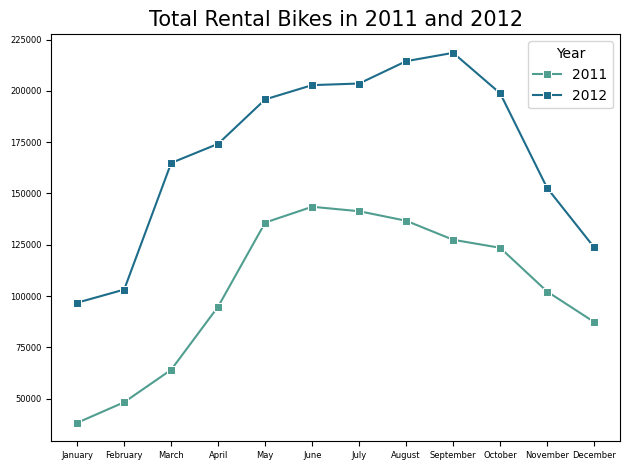

In [18]:
# Menvisualisasikan line chart jumlah sepeda yang disewa setiap bulannya pada tahun 2011 dan 2012
sns.lineplot(data=monthly_rental_df, x="mnth", y="cnt", hue="yr", palette="crest", marker="s")
plt.title("Total Rental Bikes in 2011 and 2012", loc="center", fontsize=15)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Year", loc="upper right")
plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

**Insight:**
- Posisi garis tahun 2012 yang berada di atas garis 2011 menandakan kenaikan jumlah sepeda yang disewa pada tahun 2012 dibandingkan dengan tahun 2011.
- Tahun 2011 dan 2012 memiliki tren yang mirip, yaitu jumlah sepeda yang disewa cenderung mengalami kenaikan dari Bulan Januari hingga pertengahan bulan, lalu mengalami penurunan hingga Bulan Desember.

### Pertanyaan 2: Apa perbedaan rata-rata jumlah sepeda yang disewa setiap harinya antara penyewa kasual dan penyewa terdaftar?

In [19]:
# Membuat sebuah DataFrame baru guna menampung informasi terkait rata-rata jumlah sepeda yang disewa setiap harinya dan diurutkan berdasarkan urutan rata-rata

# Penyewa kasual
casual_weekday_df = day_df.groupby("weekday").casual.mean().sort_values(ascending=False).reset_index()
casual_weekday_df

,weekday,casual
0,Saturday,1465.257143
1,Sunday,1338.295238
2,Friday,752.288462
3,Monday,674.133333
4,Thursday,590.961538
5,Tuesday,556.182692
6,Wednesday,551.144231


In [20]:
# Membuat sebuah DataFrame baru guna menampung informasi terkait rata-rata jumlah sepeda yang disewa setiap harinya (dan diurutkan berdasarkan urutan rata-rata)

# Penyewa terdaftar
registered_weekday_df = day_df.groupby("weekday").registered.mean().sort_values(ascending=False).reset_index()
registered_weekday_df

,weekday,registered
0,Thursday,4076.298077
1,Wednesday,3997.394231
2,Tuesday,3954.480769
3,Friday,3938.000000
4,Monday,3663.990476
5,Saturday,3085.285714
6,Sunday,2890.533333


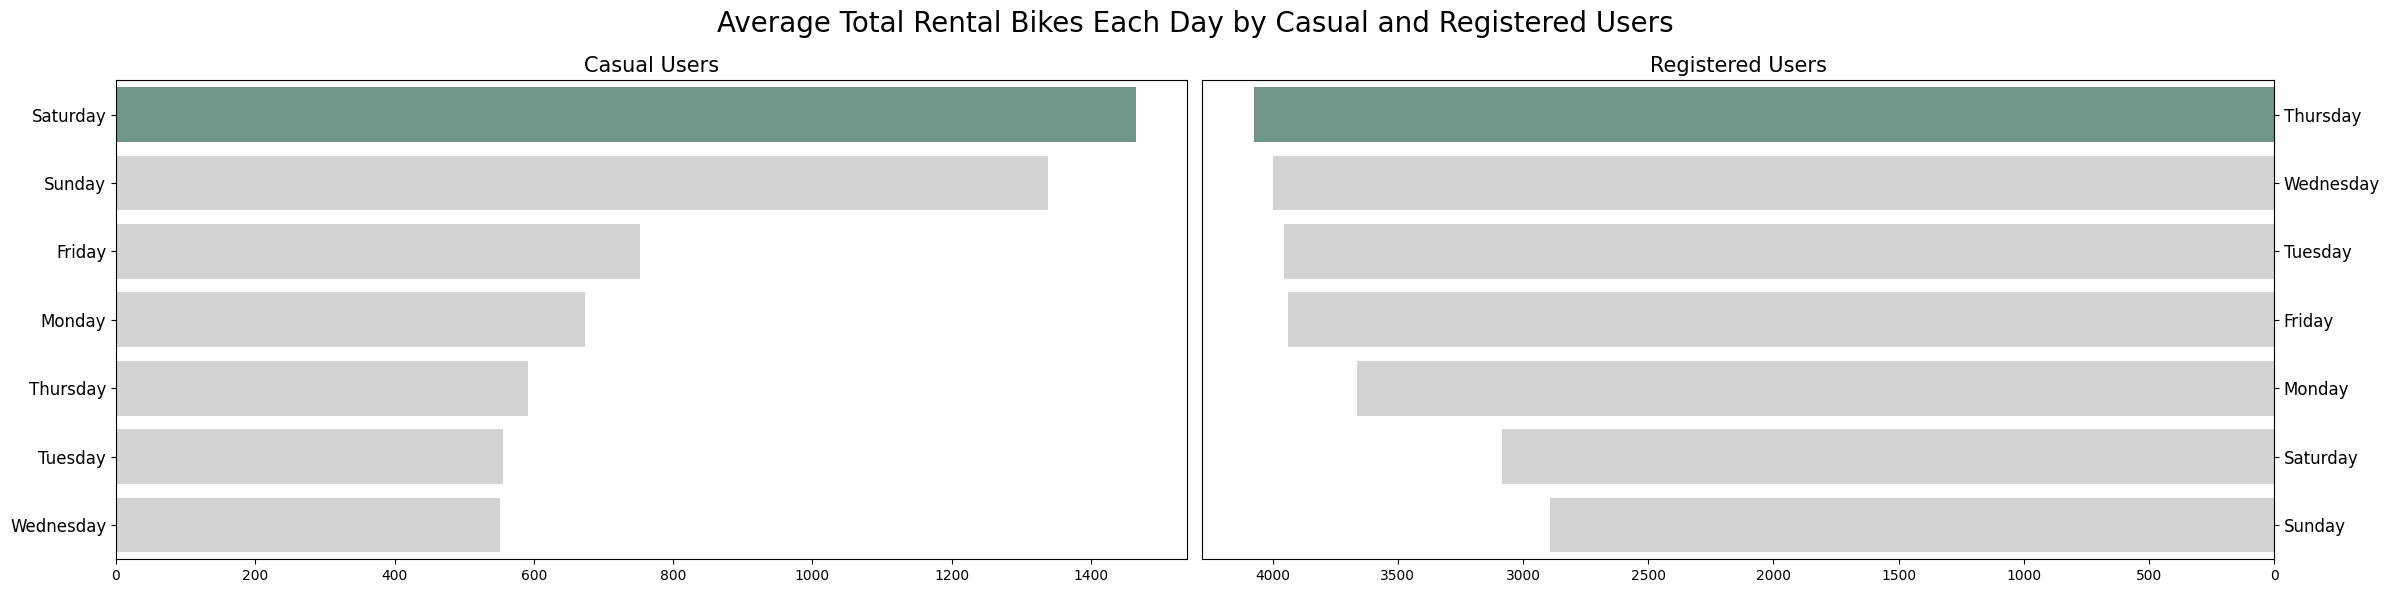

In [21]:
# Membuat kanvas kosong yang akan menampung visualisasi bar chart penyewa kasual dan penyewa terdaftar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mendifinisikan ketujuh warna (karena 1 minggu terdapat 7 hari) yang akan menjadi warna masing-masing bar
colors = ["#6A9C89", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Menvisualisasikan bar chart rata-rata jumlah sepeda yang disewa setiap harinya oleh penyewa kasual
sns.barplot(x="casual", y="weekday", data=casual_weekday_df, palette=colors, ax=ax[0], order=casual_weekday_df['weekday'])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual Users", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Menvisualisasikan bar chart rata-rata jumlah sepeda yang disewa setiap harinya oleh penyewa terdaftar
sns.barplot(x="registered", y="weekday", data=registered_weekday_df, palette=colors, ax=ax[1], order=registered_weekday_df['weekday'])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered Users", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Menampilkan hasil visualisasi
plt.suptitle("Average Total Rental Bikes Each Day by Casual and Registered Users", fontsize=20)
plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

In [22]:
# Melakukan validasi apakah rata-rata jumlah sepeda yang disewa dipengaruhi oleh hari kerja atau tidak untuk penyewa kasual dan penyewa terdaftar

# Membuat sebuah DataFrame baru guna menampung informasi terkait rata-rata jumlah sepeda yang disewa berdasarkan hari kerja atau bukan hari kerja
workingday_rental_df = day_df.groupby(by="workingday").agg({
    "casual": "mean",
    "registered": "mean"
}).reset_index()
workingday_rental_df

,workingday,casual,registered
0,Not Working Day,1371.134199,2959.034632
1,Working Day,606.570000,3978.250000


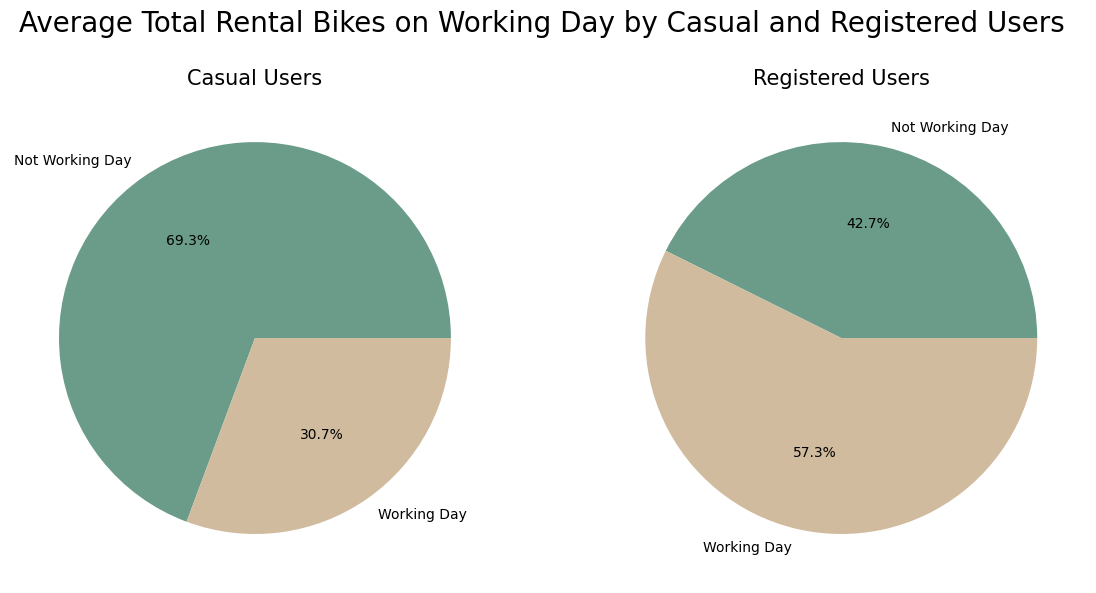

In [23]:
# Membuat kanvas kosong yang akan menampung visualisasi pie chart penyewa kasual dan penyewa terdaftar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Menvisualisasikan pie chart rata-rata jumlah sepeda yang disewa oleh penyewa kasual pada hari kerja dan bukan hari kerja
ax[0].pie(x=workingday_rental_df["casual"], labels=workingday_rental_df["workingday"], autopct='%1.1f%%', colors=["#6A9C89", "#D1BB9E"])
ax[0].set_title("Casual Users", loc="center", fontsize=15)

# Menvisualisasikan pie chart rata-rata jumlah sepeda yang disewa oleh penyewa terdaftar pada hari kerja dan bukan hari kerja
ax[1].pie(x=workingday_rental_df["registered"], labels=workingday_rental_df["workingday"], autopct='%1.1f%%', colors=["#6A9C89", "#D1BB9E"])
ax[1].set_title("Registered Users", loc="center", fontsize=15)

# Menampilkan hasil visualisasi
plt.suptitle("Average Total Rental Bikes on Working Day by Casual and Registered Users\n", fontsize=20)
plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

**Insight:**
- Rata-rata jumlah sepeda yang disewa oleh penyewa kasual paling tinggi pada Hari Sabtu dan cenderung lebih tinggi saat akhir pekan (Sabtu dan Minggu) daripada saat hari Senin, Selasa, Rabu, Kamis, dan Jumat.
- Rata-rata jumlah sepeda yang disewa oleh penyewa terdaftar paling tinggi pada Hari Kamis dan cenderung lebih tinggi saat hari Senin, Selasa, Rabu, dan Jumat daripada saat akhir pekan (Sabtu dan Minggu).
- Rata-rata jumlah sepeda yang disewa oleh penyewa kasual lebih tinggi saat bukan hari kerja, sedangkan rata-rata jumlah sepeda yang disewa oleh penyewa terdaftar lebih tinggi saat hari kerja.

### Pertanyaan 3: Bagaimana cuaca mempengaruhi rata-rata jumlah sepeda yang disewa?

In [24]:
# Membuat sebuah DataFrame baru guna menampung informasi terkait rata-rata jumlah sepeda yang disewa berdasarkan cuaca (dan diurutkan berdasarkan urutan rata-rata)
cuaca_df = day_df.groupby(by="weathersit").cnt.mean().reset_index()

# Mengganti nama kolom untuk mempermudah
cuaca_df.rename(columns={
    "weathersit": "Weather",
    "cnt": "Count Mean"
}, inplace=True)
cuaca_df

,Weather,Count Mean
0,Clear,4876.786177
1,Cloudy,4035.862348
2,Light,1803.285714


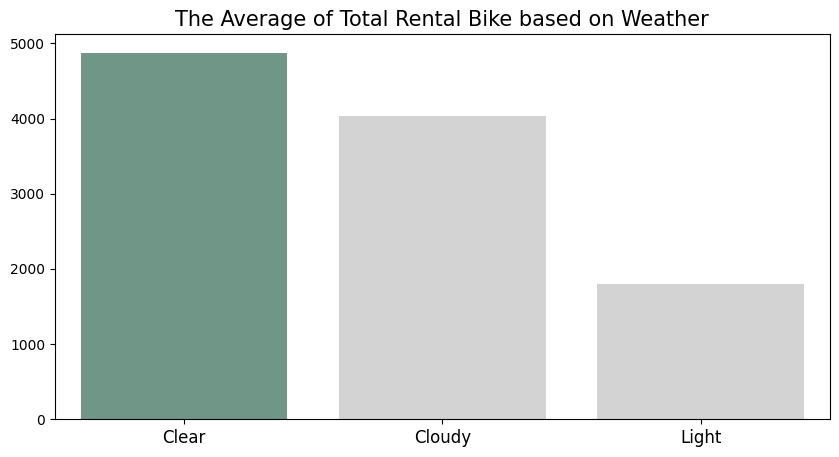

In [25]:
# Membuat bar chart rata-rata jumlah sepeda yang disewa berdasarkan cuaca
plt.figure(figsize=(10, 5))
sns.barplot(
    y="Count Mean",
    x="Weather",
    data=cuaca_df.sort_values(by="Count Mean", ascending=False),
    palette=colors
)
plt.title("The Average of Total Rental Bike based on Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Rata-rata jumlah sepeda yang disewa paling tinggi saat cuaca cerah (Clear), cukup tinggi saat cuaca berawan (Cloudy), dan paling rendah saat cuaca hujan/salju ringan (Light).

### Pertanyaan 4: Apa hubungan antara jumlah sepeda yang disewa dengan suhu, kelembapan, dan kecepatan angin?

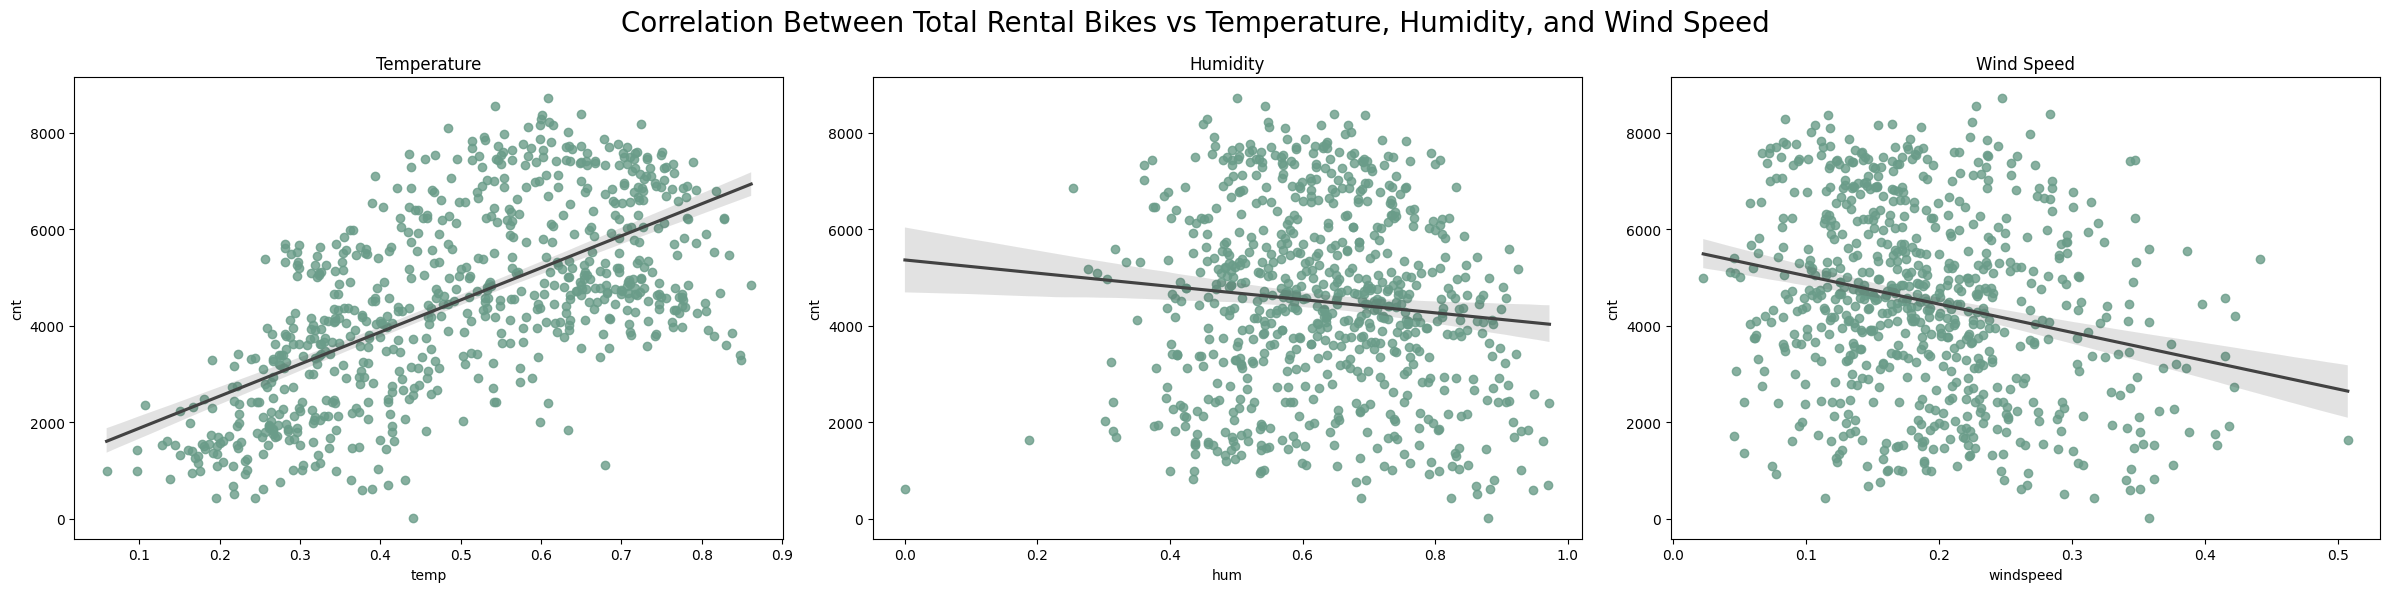

In [26]:
# Membuat kanvas kosong yang akan menampung visualisasi scatter plot jumlah sepeda yang disewa dengan suhu, kelembapan, dan kecepatan
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Menvisualisasikan scatter plot jumlah sepeda yang disewa dengan suhu
sns.regplot(x=day_df["temp"], y=day_df["cnt"], ax=ax[0], color="#6A9C89", line_kws={"color": "#424242"})
ax[0].set_title("Temperature")

# Menvisualisasikan scatter plot jumlah sepeda yang disewa dengan kelembapan
sns.regplot(x=day_df["hum"], y=day_df["cnt"], ax=ax[1], color="#6A9C89", line_kws={"color": "#424242"})
ax[1].set_title("Humidity")

# Menvisualisasikan scatter plot jumlah sepeda yang disewa dengan kecepatan angin
sns.regplot(x=day_df["windspeed"], y=day_df["cnt"], ax=ax[2], color="#6A9C89", line_kws={"color": "#424242"})
ax[2].set_title("Wind Speed")

plt.suptitle("Correlation Between Total Rental Bikes vs Temperature, Humidity, and Wind Speed", fontsize=20)
plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

**Insight:**
- Jumlah sepeda yang disewa dan suhu memiliki korelasi bersesuaian yang cukup kuat karena garis meningkat ke kanan atas dan titik-titik data cukup mendekati garis. Hal ini berarti, semakin tinggi suhu maka semakin banyak sepeda yang disewa.
- Jumlah sepeda yang disewa dan kelembapan memiliki korelasi berlawanan yang lemah karena garis menurun ke kanan bawah dan titik-titik data cukup menjauhi mendekati garis. Hal ini berarti, semakin tinggi kelembapan, terdapat kemungkinan sepeda yang disewa semakin sedikit.
- Jumlah sepeda yang disewa dan kecepatan angin memiliki korelasi berlawanan yang lemah karena garis menurun ke kanan bawah dan titik-titik data sedikit menjauhi mendekati garis. Hal ini berarti, semakin tinggi kecepatan angin maka terdapat kemungkinan sepeda yang disewa semakin sedikit.

## Conclusion

- Conclusion Pertanyaan 1: Dalam 2 tahun terakhir, yaitu tahun 2011 dan 2012, jumlah sepeda yang disewa mengalami kenaikan. Selain itu, tahun 2011 dan 2012 juga memiliki tren yang mirip, yaitu jumlah sepeda yang disewa cenderung mengalami kenaikan dari Bulan Januari hingga pertengahan bulan, lalu mengalami penurunan hingga Bulan Desember
- Conclusion Pertanyaan 2: Rata-rata jumlah sepeda yang disewa oleh penyewa kasual lebih tinggi saat akhir pekan atau saat bukan hari kerja, sedangkan di sisi lain, rata-rata jumlah sepeda yang disewa oleh penyewa terdaftar lebih tinggi saat Hari Senin, Selasa, Rabu, Kamis, dan Jumat atau saat hari kerja.
- Pertanyaan 3: Cuaca memiliki pengaruh pada rata-rata jumlah sepeda yang disewa. Rata-rata paling tinggi jumlah sepeda yang disewa adalah saat cuaca cerah (Clear), cukup tinggi saat cuaca berawan (Cloudy), dan paling rendah saat cuaca hujan/salju ringan (Light).
- Pertanyaan 4: Jumlah sepeda yang disewa dan suhu memiliki korelasi/hubungan bersesuaian yang cukup kuat yang berarti semakin tinggi suhu maka semakin banyak sepeda yang disewa. Jumlah sepeda yang disewa dan kelembapan memiliki korelasi/hubungan berlawanan yang lemah yang berarti semakin tinggi kelembapan, terdapat kemungkinan sepeda yang disewa semakin sedikit. Jumlah sepeda yang disewa dan kecepatan angin memiliki korelasi/hubungan berlawanan yang lemah yang berarti semakin tinggi kecepatan angin maka terdapat kemungkinan sepeda yang disewa semakin sedikit.

## (Tambahan) Menyimpan Data ke main_data.csv untuk Proses Pembuatan Dashboard

In [27]:
# Menyimpan data yang bersih ke file csv yang akan digunakan pada proses pembuatan dashboard
day_df.to_csv("main_data.csv", index=False)